In [1]:
import os
import pickle

# numpy
import numpy as np
import numpy.ma as ma

from skimage.transform import resize
from math import pi

# plotting
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('default')

# netCDF
import netCDF4 as nc

from tqdm.notebook import tqdm
from tqdm.notebook import trange

In [2]:
def get_timeperiod(f):
    rng = f.split('_')[-1][:-3]
    return [int(s[:-2]) for s in rng.split('-')]

In [12]:
%%time

# read through each model and grab the data
xhist = []
hist_files = sorted(os.listdir('../data/hist_pr'))

for f in hist_files:
    if f[0:2] == 'pr':
        ncdata = nc.Dataset('../data/hist_pr/' + f, "r")

        tp = get_timeperiod(f)
        n_begin = (1950 - tp[0]) * 12
        n_end = (2015 - tp[0]) * 12

        xi = ncdata.variables['pr'][n_begin:n_end]
        xi = np.array(xi)
        xi[xi < 1e-16] = 1e-16
        xi = xi * 86400
        xi = np.rot90(xi, k = 2, axes = (1, 2))
        xi = np.flip(xi, axis = 2)
    
        xhist.append(xi)
        
        print(f)

/home/trevorh2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc
pr_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc
pr_Amon_CMCC-CM2-SR5_historical_r1i1p1f1_gn_185001-201412.nc
pr_Amon_CanESM5-CanOE_historical_r2i1p2f1_gn_185001-201412.nc
pr_Amon_CanESM5_historical_r7i1p2f1_gn_185001-201412.nc
pr_Amon_CanESM5_historical_r8i1p2f1_gn_185001-201412.nc
pr_Amon_FIO-ESM-2-0_historical_r1i1p1f1_gn_185001-201412.nc
pr_Amon_GFDL-ESM4_esm-hist_r1i1p1f1_gr1_195001-201412.nc
pr_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_195001-201412.nc
pr_Amon_IPSL-CM6A-LR_historical_r11i1p1f1_gr_185001-201412.nc
pr_Amon_IPSL-CM6A-LR_historical_r21i1p1f1_gr_185001-201412.nc
pr_Amon_KACE-1-0-G_historical_r1i1p1f1_gr_185001-201412.nc
pr_Amon_MCM-UA-1-0_historical_r1i1p1f2_gn_185001-201412.nc
pr_Amon_MIROC-ES2L_historical_r1i1p1f2_gn_185001-201412.nc
pr_Amon_MIROC-ES2L_historical_r6i1p1f2_gn_185001-201412.nc
pr_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc
CPU times: user 7.45 s, sys: 1.23 s, total: 8.68 s


In [25]:
%%time

# read through each model and grab the data
xhist = []
hist_files = sorted(os.listdir('../data/hist_pr'))

for i, f in enumerate(hist_files):
    if f[0:2] == 'pr':
        print(i, f.split('_')[2])

1 ACCESS-CM2
2 BCC-CSM2-MR
3 CMCC-CM2-SR5
4 CanESM5-CanOE
5 CanESM5
6 CanESM5
7 FIO-ESM-2-0
8 GFDL-ESM4
9 INM-CM5-0
10 IPSL-CM6A-LR
11 IPSL-CM6A-LR
12 KACE-1-0-G
13 MCM-UA-1-0
14 MIROC-ES2L
15 MIROC-ES2L
16 MRI-ESM2-0
CPU times: user 1.65 ms, sys: 1.94 ms, total: 3.59 ms
Wall time: 1.87 ms


In [4]:
[a.shape for a in xhist]

[(780, 144, 192),
 (780, 160, 320),
 (780, 192, 288),
 (780, 64, 128),
 (780, 64, 128),
 (780, 64, 128),
 (780, 192, 288),
 (780, 180, 288),
 (780, 120, 180),
 (780, 143, 144),
 (780, 143, 144),
 (780, 144, 192),
 (780, 80, 96),
 (780, 64, 128),
 (780, 64, 128),
 (780, 160, 320)]

In [3]:
%%time

xrcp = []
rcp85_files = sorted(os.listdir('../data/ssp_pr/'))
j = 0

for i, f in enumerate(rcp85_files):
    
    if f[0:2] == 'pr':
        ncdata = nc.Dataset('../data/ssp_pr/' + f, "r")

        tp = get_timeperiod(f)
        n_begin = 0
        n_end = (2100 - tp[0]) * 12

        xi = ncdata.variables['pr'][n_begin:n_end]
        xi = np.array(xi)
        xi[xi < 1e-16] = 1e-16
        xi = xi * 86400
        xi = np.rot90(xi, k = 2, axes = (1, 2))
        xi = np.flip(xi, axis = 2)

        if tp[0] == 2015:
            xrcp.append(xi)
        else:
            xrcp[i-1-j] = np.concatenate([xrcp[i-1-j], xi], axis = 0)
            j += 1

        print(f)

/home/trevorh2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


pr_Amon_ACCESS-CM2_ssp245_r1i1p1f1_gn_201501-210012.nc
pr_Amon_BCC-CSM2-MR_ssp245_r1i1p1f1_gn_201501-210012.nc
pr_Amon_CMCC-CM2-SR5_ssp245_r1i1p1f1_gn_201501-210012.nc
pr_Amon_CanESM5-CanOE_ssp245_r2i1p2f1_gn_201501-210012.nc
pr_Amon_CanESM5_ssp245_r7i1p1f1_gn_201501-210012.nc
pr_Amon_CanESM5_ssp245_r8i1p2f1_gn_201501-210012.nc
pr_Amon_FIO-ESM-2-0_ssp245_r1i1p1f1_gn_201501-210012.nc
pr_Amon_GFDL-ESM4_ssp245_r1i1p1f1_gr1_201501-210012.nc
pr_Amon_INM-CM5-0_ssp245_r1i1p1f1_gr1_201501-210012.nc
pr_Amon_IPSL-CM6A-LR_ssp245_r1i1p1f1_gr_201501-210012.nc
pr_Amon_IPSL-CM6A-LR_ssp245_r2i1p1f1_gr_201501-210012.nc
pr_Amon_KACE-1-0-G_ssp245_r1i1p1f1_gr_201501-210012.nc
pr_Amon_MCM-UA-1-0_ssp245_r1i1p1f2_gn_201501-210012.nc
pr_Amon_MIROC-ES2L_ssp245_r1i1p1f2_gn_201501-210012.nc
pr_Amon_MIROC-ES2L_ssp245_r6i1p1f2_gn_201501-210012.nc
pr_Amon_MRI-ESM2-0_ssp245_r1i1p1f1_gn_201501-210012.nc
CPU times: user 9.9 s, sys: 2.36 s, total: 12.3 s
Wall time: 15.3 s


In [6]:
[a.shape for a in xrcp]

[(1020, 144, 192),
 (1020, 160, 320),
 (1020, 192, 288),
 (1020, 64, 128),
 (1020, 64, 128),
 (1020, 64, 128),
 (1020, 192, 288),
 (1020, 180, 288),
 (1020, 120, 180),
 (1020, 143, 144),
 (1020, 143, 144),
 (1020, 144, 192),
 (1020, 80, 96),
 (1020, 64, 128),
 (1020, 64, 128),
 (1020, 160, 320)]

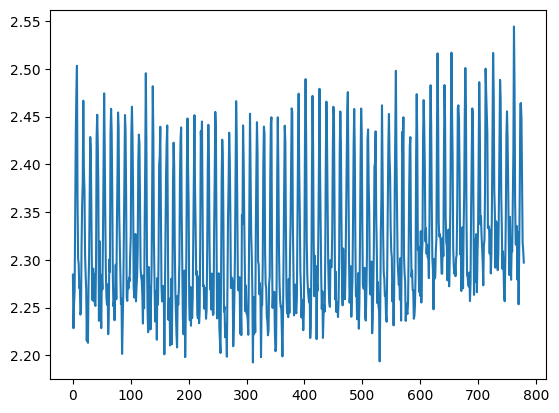

In [7]:
gmst_h = np.mean(xhist[3], axis = (1, 2))
plt.plot(gmst_h)

In [ ]:
pickle.dump(xhist, open( "../data/saved/xhist_pr.pkl", "wb"))
pickle.dump(xrcp, open( "../data/saved/xrcp_pr.pkl", "wb")

In [5]:
#### reanalaysis

In [23]:
ncdata = nc.Dataset('../data/obs/obs_1950_1979.nc', "r")
y1 = ncdata.variables['tp']
y1 = np.array(y1)
# y1[y1 < 1e-16] = 1e-16
# y1 = y1 * 1000

In [16]:
xhist = []
hist_files = sorted(os.listdir('../data/hist_pr'))

for f in hist_files:
    if f[0:2] == 'pr':
        ncdata = nc.Dataset('../data/hist_pr/' + f, "r")

        tp = get_timeperiod(f)
        n_begin = (1950 - tp[0]) * 12
        n_end = (2015 - tp[0]) * 12

        xi = ncdata.variables['pr'][n_begin:n_end]
        xi = np.array(xi)
#         xi[xi < 1e-16] = 1e-16
#         xi = xi * 86400

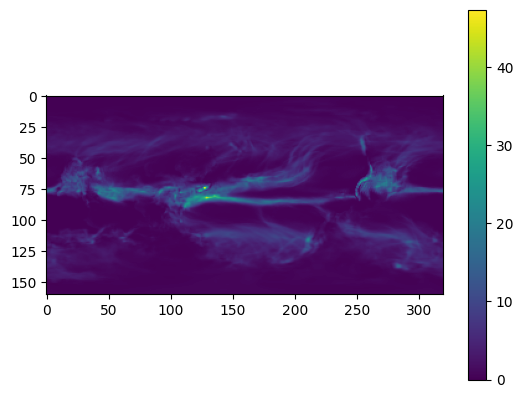

In [18]:
plt.imshow(xi[0] * 86400)
plt.colorbar()

In [3]:
%%time

ncdata = nc.Dataset('../data/obs/obs_1950_1979.nc', "r")
y1 = ncdata.variables['tp']
y1 = np.array(y1)
y1[y1 < 1e-16] = 1e-16
y1 = y1 * 1000


ncdata = nc.Dataset('../data/obs/obs_1979_2021.nc', "r")
y2 = ncdata.variables['tp']
y2 = np.array(y2)
y2[y2 < 1e-16] = 1e-16
y2 = y2 * 1000
y2 = y2[:, 0]


y = np.vstack([y1, y2])

/home/trevorh2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/home/trevorh2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from

CPU times: user 21 s, sys: 14.3 s, total: 35.3 s
Wall time: 39.4 s


In [12]:
y.shape

(861, 721, 1440)

In [13]:
np.save('../data/saved/pr_obs.npz', y)